# Analize results

In [1]:
import supportFiles.myFunc as myF
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filepath = "./dissertation/" #"./x archive x/models_2022_01_10/" #

In [3]:
temp = []

# Load files of pcapType and datasetType no more than maxNumFiles
files = [s for s in os.listdir(filepath) if ("fscore_SCAN" in s and "CIC.csv" in s)]
for file in files:
    temp.append(pd.read_csv(filepath+file, sep=','))
    temp[-1]["origin"] = file.split("_")[2]
data = pd.concat(temp, names=["lero"], ignore_index=True)

In [29]:
data.at[0,'Data Set'] = 'NB15_CIC'
data.at[1,'Data Set'] = 'CIC-IDS_CIC'
data.at[2,'Data Set'] = 'ToN-IoT_CIC'

In [4]:
data.drop(["Unnamed: 0"], axis=1, inplace=True)
data

,Data Set,DT,LR,MLP,NB,SVM,XGB,origin
0,SCAN_NB15_CIC,0.019087,0.000000,0.005719,0.013044,0.000000,0.018012,AB-TRAP
1,SCAN_CIC-IDS_CIC,0.001444,0.192678,0.151278,0.164927,0.239788,0.098294,AB-TRAP
2,SCAN_ToN-IoT_CIC,0.037199,0.000000,0.000000,0.000000,0.000000,0.033043,AB-TRAP
3,SCAN_BoT-IoT_CIC,0.076303,0.377731,0.785916,0.377807,0.677406,0.214394,AB-TRAP
4,SCAN_internet_CIC,0.070843,0.000000,0.065148,0.019657,0.000000,0.066456,AB-TRAP
5,SCAN_AB-TRAP_CIC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,BoT-IoT
6,SCAN_NB15_CIC,0.000839,0.019863,0.072001,0.277592,0.186647,0.165128,BoT-IoT
7,SCAN_CIC-IDS_CIC,0.208520,0.009897,0.000261,0.000482,0.238403,0.338349,BoT-IoT
8,SCAN_ToN-IoT_CIC,0.095319,0.030046,0.027996,0.000000,0.028820,0.087745,BoT-IoT
9,SCAN_internet_CIC,0.029005,0.022592,0.009359,0.010999,0.022900,0.020179,BoT-IoT


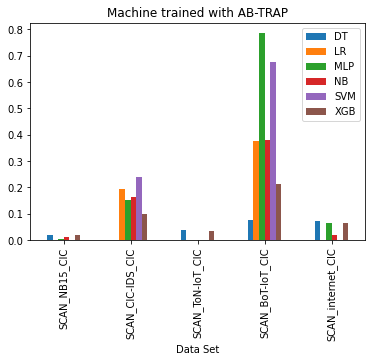

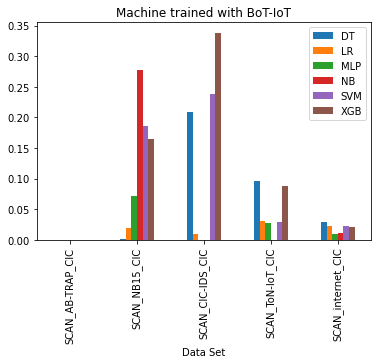

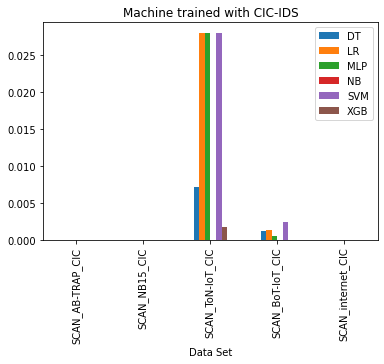

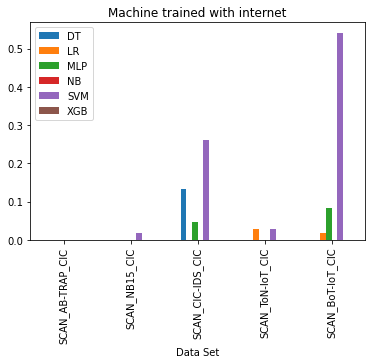

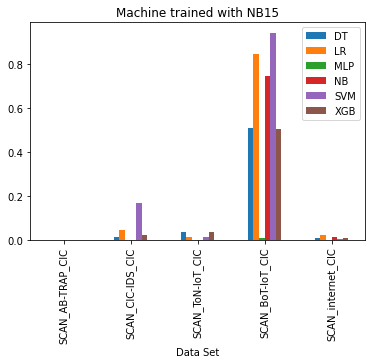

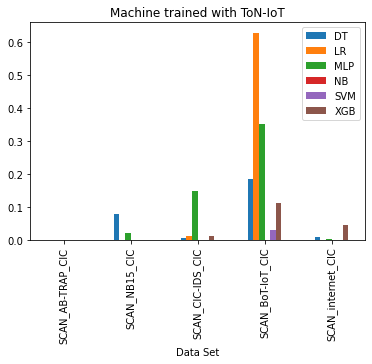

In [5]:
for o in data.origin.unique():
    data[data['origin']==o].plot(x="Data Set", kind="bar", stacked=False, title="Machine trained with {0}".format(o))
    plt.savefig("./ML-output/results_{0}.jpg".format(o), dpi=300, bbox_inches="tight")

# TRASH

In [8]:
machines = [x for x in data.columns if x not in ["Data Set", "origin"]]
temp = []
for ml in machines:
    temp.append(data[["Data Set", "origin", ml]].rename(columns={ml:"score"}) )
    temp[-1]["ML"] = ml
df = pd.concat(temp, ignore_index=True)

ML
DT     AxesSubplot(0.125,0.125;0.775x0.755)
LR     AxesSubplot(0.125,0.125;0.775x0.755)
MLP    AxesSubplot(0.125,0.125;0.775x0.755)
NB     AxesSubplot(0.125,0.125;0.775x0.755)
SVM    AxesSubplot(0.125,0.125;0.775x0.755)
XGB    AxesSubplot(0.125,0.125;0.775x0.755)
Name: score, dtype: object

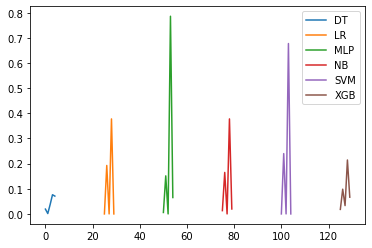

In [20]:
#df[df["origin"]=="AB-TRAP"]
df2 = df[df['origin']=="AB-TRAP"]
df2.plot(x="Data Set", kind="bar", stacked=False, title="teste")

### Get models and target DS. Only scan for now

In [2]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 3
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:27:14
setTarget: Removed 2800319 flows from other attack types



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


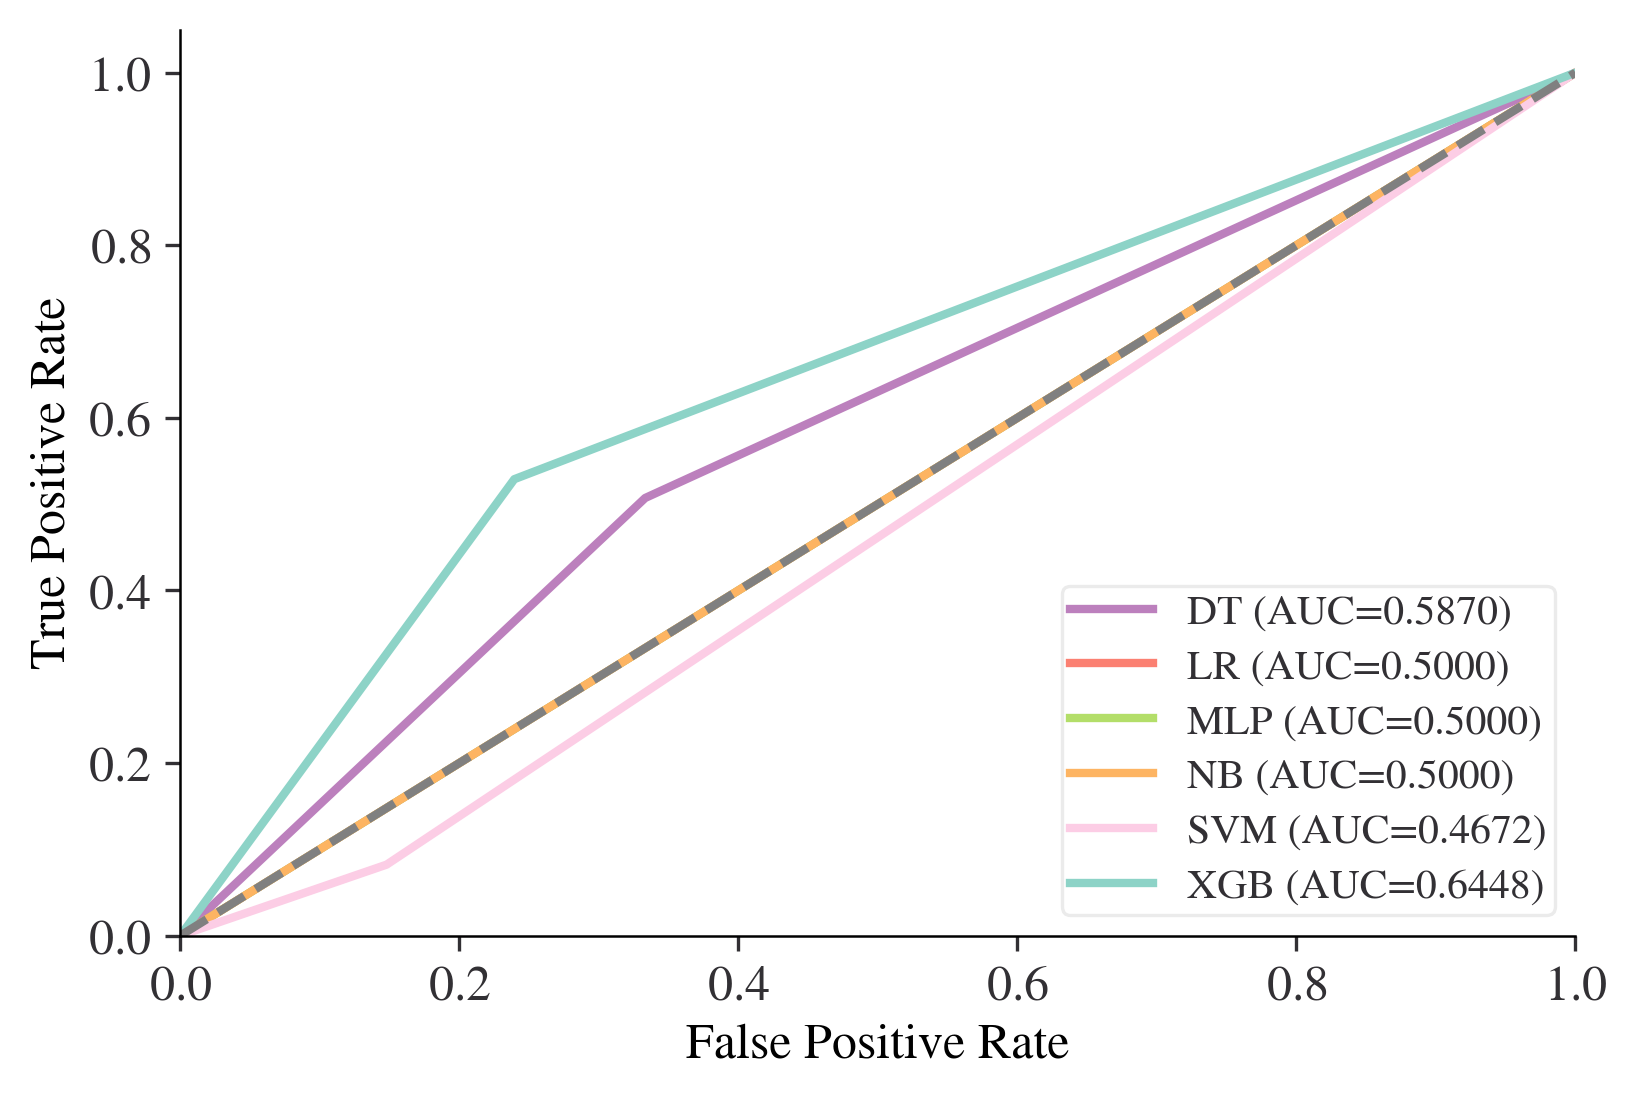

In [3]:
import os
from sklearn.metrics import roc_curve, auc
plt.style.use('supportFiles/plot_style.txt')

plt.figure()

index = 0
for model_key, model in models.items():
    fpr, tpr, thresholds = roc_curve( y, model.predict(prep.transform(X)) )
    AUC = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, label="{} (AUC={:.4f})".format(model_key, AUC))
    index = index + 1
    # save ROC data
filename = 'dissertation/{0}_on_{1}_ROC.eps'.format(trainerDSName, testerDSName)
    #pd.DataFrame.from_dict(data={ 'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds }).to_csv(filename, index=False)
    
plt.plot([0,1], [0,1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

plt.savefig(filename, dpi=300, bbox_inches="tight")

# Feature Importance

In [2]:
from supportFiles.myFunc import loadModel, getDSName, setTarget, loadDataset
from joblib import dump, load
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
getDSName(0)

'AB-TRAP_CIC'

In [3]:
#Datasets available are :
# {0: 'AB-TRAP', 1: 'NB15', 2: 'CIC-IDS', 3: 'ToN-IoT', 4: 'BoT-IoT'}
trainerDS = 0
testerDS = 1
modelName = "DT"
# Set names
trainerDSName = getDSName(trainerDS,1,True,True)
testerDSName = getDSName(testerDS,1,True,True)

models, prep, table, algo = loadModel(trainerDSName)
X, y = setTarget(loadDataset(testerDS, 96, 1), testerDS, True, True, trainerDS)

loading models from SCAN_AB-TRAP_CIC
Models fetched: ['SCAN_AB-TRAP_CIC_DT.joblib', 'SCAN_AB-TRAP_CIC_LR.joblib', 'SCAN_AB-TRAP_CIC_MLP.joblib', 'SCAN_AB-TRAP_CIC_NB.joblib', 'SCAN_AB-TRAP_CIC_SVM.joblib', 'SCAN_AB-TRAP_CIC_XGB.joblib']
DT's index of best performance: 5
LR's index of best performance: 0
MLP's index of best performance: 0
NB's index of best performance: 0
SVM's index of best performance: 0
XGB's index of best performance: 0
DT
Loading data set from existing file: ToN-IoT_CIC.csv
reading file: 
2021-12-22 16:37:18
setTarget: Removed 2800319 flows from other attack types



In [4]:
clf = models['DT'].best_estimator_
relevantes = clf.feature_importances_
for index in range(len(X.columns)):#.iterrows():
    print(relevantes[index], X.columns[index])

0.030646460694887998 dst_port
0.00015401052224450892 protocol
0.05057666123323057 flow_duration
0.0012471967142684448 tot_fwd_pkts
0.0004937814954736841 tot_bwd_pkts
0.0011304913840673803 totlen_fwd_pkts
0.668094413096149 totlen_bwd_pkts
0.0 fwd_pkt_len_max
6.332667075819838e-07 fwd_pkt_len_min
0.01731374489327274 fwd_pkt_len_mean
1.1969071703233349e-05 fwd_pkt_len_std
2.7443346885025707e-05 bwd_pkt_len_max
0.01383389892443263 bwd_pkt_len_min
0.01241153345860021 bwd_pkt_len_mean
3.41707955262527e-06 bwd_pkt_len_std
0.0 flow_byts_s
0.0 flow_pkts_s
7.260043465016409e-06 flow_iat_mean
0.0 flow_iat_std
0.005227212844797067 flow_iat_max
0.0 flow_iat_min
0.0013094219358569445 fwd_iat_tot
0.004536486342682055 fwd_iat_mean
0.017576033666177226 fwd_iat_std
6.238579690585743e-05 fwd_iat_max
0.07287243827095125 fwd_iat_min
0.02650417743268357 bwd_iat_tot
0.0 bwd_iat_mean
5.516701659845986e-06 bwd_iat_std
1.3084624213039704e-05 bwd_iat_max
0.00040124477032468136 bwd_iat_min
4.706416913105081e-05 f

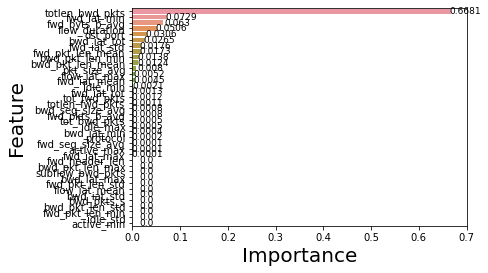

In [30]:
import seaborn as sns
import os

fi_df = pd.DataFrame(relevantes)

fi_df.sort_values(by=['feature_importance'], ascending=False, inplace=True)

relevantes = fi_df[fi_df.feature_importance > 0]

#plt.figure(figsize=(10,8))
g=sns.barplot(x=relevantes['feature_importance'], y=relevantes['feature_name'])

plt.xlabel('Importance', fontsize=20)
plt.ylabel('Feature', fontsize=20);
i=0
for index, row in relevantes.iterrows():
    g.text(row.feature_importance+0.03, i, round(row.feature_importance, 4), color='black', ha="center", va="center", fontsize=9)
    i+=1
filename = 'dissertation/feat_imp_{0}_{1}.eps'.format(trainerDSName, modelName)
plt.savefig(filename, dpi=300, bbox_inches = "tight")

In [1]:
import pandas as pd
import numpy as np
import os
from supportFiles.myFunc import saveTable

files = [s for s in os.listdir("./dissertation/") if ((".csv" in s) and ("fscore_" in s))]
print(files)
for file in files:
    tableName = file.replace(".csv","")
    table = pd.read_csv("./dissertation/"+file, sep=',')
    caption = "Feature importance {0}".format(tableName)
    label = tableName
    saveTable(table, tableName, caption, label)

['fscore_AB-TRAP_CIC.csv', 'fscore_BoT-IoT_CIC.csv', 'fscore_NB15_CIC.csv', 'fscore_SCAN_AB-TRAP_CIC.csv', 'fscore_SCAN_BoT-IoT_CIC.csv', 'fscore_SCAN_CIC-IDS_CIC.csv', 'fscore_SCAN_NB15_CIC.csv', 'fscore_SCAN_ToN-IoT_CIC.csv', 'fscore_ToN-IoT_CIC.csv']
